In [63]:
# Import necessary packages

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression
from array import *
import csv
from sklearn.model_selection import cross_val_score, ShuffleSplit

In [93]:
# Import QB datasets

qbpath2013 = r"C:\Users\Jeremy\Desktop\QB2013.csv"
qbpath2014 = r"C:\Users\Jeremy\Desktop\QB2014.csv"
qbpath2015 = r"C:\Users\Jeremy\Desktop\QB2015.csv"
qbpath2016 = r"C:\Users\Jeremy\Desktop\QB2016.csv"
qbpath2017 = r"C:\Users\Jeremy\Desktop\QB2017.csv"
qbpath_aggregate = r"C:\Users\Jeremy\Desktop\QB_Aggregate.csv"
dfQB2013 = pd.read_csv(qbpath2013)
dfQB2014 = pd.read_csv(qbpath2014)
dfQB2015 = pd.read_csv(qbpath2015)
dfQB2016 = pd.read_csv(qbpath2016)
dfQB2017 = pd.read_csv(qbpath2017)
dfQBA = pd.read_csv(qbpath_aggregate)

In [61]:
# Fill empty spaces

dfQB2013 = dfQB2013.fillna(0)
dfQB2014 = dfQB2014.fillna(0)
dfQB2015 = dfQB2015.fillna(0)
dfQB2016 = dfQB2016.fillna(0)
dfQB2017 = dfQB2017.fillna(0)
dfQBA = dfQBA.fillna(0)

In [64]:
# Create train and test sets

train, test = train_test_split(dfQBA, test_size=0.25, random_state=42)
 
xtrain = train[['RZPIn20', 'RZPIn10', 'RZPIn5', 'RZRIn20', 'RZRIn10', 'RZRIn5', '%Tm', 'COMP', 'PATT', 'Pa20+', 'Pa40+', 'INT', 'YPA', 'RATT' ]]
ytrain = train[['FanPts']]
 
xtest = test[['RZPIn20', 'RZPIn10', 'RZPIn5', 'RZRIn20', 'RZRIn10', 'RZRIn5', '%Tm', 'COMP', 'PATT', 'Pa20+', 'Pa40+', 'INT', 'YPA', 'RATT' ]]
ytest = test[['FanPts']]

# Linear regression model and accuracy test

linReg = linear_model.LinearRegression()
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print(y_predLin - ytest)

print('Coefficients: \n', linReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

         FanPts
299   -6.215522
501   -6.242127
631   -5.431705
2098   7.117876
1377   1.071418
1709   2.183490
564   -7.961835
1323   3.719190
3059  -6.039264
438   -1.078180
2509  -6.629931
871   -2.264511
2969   2.911394
1837   7.159656
1116  -4.500285
30     4.623693
184   -1.078180
2696   3.699882
2276  -3.850235
2903  -0.361647
410    2.928225
1320   6.830360
527   -5.357432
1754   6.523387
1027   1.710571
2251   2.076752
291    4.292755
439   -1.078180
486   -5.512153
2699   1.600479
...         ...
1422  -0.502165
3204  12.390921
415    0.909780
1113  -0.791301
912   -2.913985
2989   0.779959
1003   6.445469
199   -1.018096
1134  -7.485022
2866   2.564624
2575  -1.683010
2359  -1.121793
283    1.862781
2562   0.823452
231   -3.966867
840   -2.069973
1149   3.376528
96     4.558955
1950  -5.865165
2760   0.768707
1847   0.648450
1270  -0.986504
1833   0.602856
1080   4.406380
3148   2.589613
2778   1.697805
1650   4.411520
2409   4.327986
104    2.157166
2400   5.506445

[806 ro

In [65]:
# Ridge  regression model and accuracy test

ridgeReg = linear_model.Ridge(alpha = 5)

ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print(y_predRidge - ytest)

print('Coefficients: \n', ridgeReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

         FanPts
299   -6.224402
501   -6.238410
631   -5.424141
2098   7.119121
1377   1.066453
1709   2.172395
564   -7.963357
1323   3.731273
3059  -6.059842
438   -1.080341
2509  -6.619954
871   -2.258321
2969   2.914757
1837   7.104564
1116  -4.496024
30     4.624843
184   -1.080341
2696   3.699868
2276  -3.860013
2903  -0.364743
410    2.944903
1320   6.796441
527   -5.367194
1754   6.530279
1027   1.682405
2251   2.095719
291    4.303822
439   -1.080341
486   -5.556271
2699   1.602320
...         ...
1422  -0.496340
3204  12.396521
415    0.902726
1113  -0.783427
912   -2.886076
2989   0.769833
1003   6.442437
199   -1.020115
1134  -7.482199
2866   2.581657
2575  -1.677284
2359  -1.108222
283    1.864084
2562   0.819056
231   -3.964296
840   -2.085367
1149   3.373472
96     4.549451
1950  -5.870643
2760   0.778702
1847   0.670818
1270  -0.980146
1833   0.586664
1080   4.410230
3148   2.588191
2778   1.648228
1650   4.416194
2409   4.324256
104    2.161906
2400   5.512014

[806 ro

In [66]:
# Bayesian Ridge accuracy

bayesianRidge = linear_model.BayesianRidge()

bayesianRidge.fit(xtrain, ytrain)

y_pred_bayesianRidge = bayesianRidge.predict(xtest)

print('Coefficients: \n', bayesianRidge.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred_bayesianRidge))
print('Variance score: %.3f' % r2_score(ytest, y_pred_bayesianRidge))

Coefficients: 
 [ 0.07736695  0.44608859  0.22726368 -0.14606426  1.34217915 -0.2867432
  0.00920487  0.53229804 -0.02334161  1.0883271   1.85407934 -0.20677583
  0.43412958  0.61153849]
Mean squared error: 18.946
Variance score: 0.833


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
# Support vector predictions and accuracy 
svr_rbf = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

y_rbf = svr_rbf.predict(xtest)

print(y_rbf - ytest['FanPts'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rbf))
print('Variance score: %.3f' % r2_score(ytest, y_rbf))


299     -4.867459
501     -6.412950
631     -3.049127
2098     1.637967
1377     0.040170
1709     3.195084
564     -5.434007
1323     0.803008
3059    -8.118546
438      0.051409
2509    -4.363308
871     -0.488525
2969     2.955278
1837     7.907370
1116    -6.082105
30       4.529803
184      0.051409
2696     0.159953
2276     0.319994
2903     0.004355
410      6.436134
1320    10.374643
527     -2.253570
1754     3.401685
1027    -1.850247
2251     3.993769
291      0.099903
439      0.051409
486     -6.078998
2699    -0.247105
          ...    
1422    -2.317604
3204     6.858782
415      2.906019
1113    -0.155393
912     -0.831694
2989    -2.451880
1003     7.142165
199     -0.806798
1134    -3.816555
2866     0.527213
2575    -1.810856
2359    -1.598062
283     -0.675460
2562     1.848344
231     -4.681881
840     -1.630310
1149     1.194288
96       0.834836
1950    -8.591156
2760     1.456922
1847    -3.860606
1270     0.781800
1833    -2.235439
1080     3.229965
3148     3

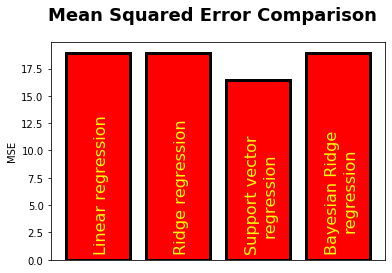

In [89]:
# Mean Squared Error comparison

msePlot, ax = plt.subplots()

mseScores = [mean_squared_error(ytest, y_predLin), mean_squared_error(ytest, y_predRidge), mean_squared_error(ytest, y_rbf), mean_squared_error(ytest, y_pred_bayesianRidge)]
x_pos = np.arange(len(mseScores))

ax.bar(x_pos, mseScores, color = 'red', edgecolor = 'Black', linewidth = 3)

mseNames = ["Linear regression", "Ridge regression", "Support vector\nregression", "Bayesian Ridge \nregression"]

labels = [i for i in mseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'Yellow', size = 16)

msePlot.suptitle("Mean Squared Error Comparison", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("MSE")

msePlot.savefig('mse-plot.png', dpi = 400, bbox_inches = 'tight')

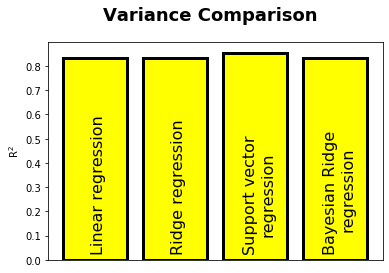

In [88]:
# Variance comparison

r2plot, ax = plt.subplots()

r2scores = [r2_score(ytest, y_predLin), r2_score(ytest, y_predRidge), r2_score(ytest, y_rbf), r2_score (ytest, y_pred_bayesianRidge)]
x_pos = np.arange(len(r2scores))

ax.bar(x_pos, r2scores,color = 'yellow', edgecolor = 'Black', linewidth = 3)

r2names = ["Linear regression", "Ridge regression", "Support vector\nregression", "Bayesian Ridge \nregression"]

labels = [i for i in r2names]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .025
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'black', size = 16)

r2plot.suptitle("Variance Comparison", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel(r"R$^{\rm 2}$")

r2plot.savefig('r2-plot.png', dpi = 400, bbox_inches = 'tight')

In [95]:
# Make predictions for 2013 using Linear regression

names = dfQB2013.iloc[:, 0]
dfQBtest1 = dfQB2013.loc[:, 'RZPIn20': 'RATT']

linear_preds = linReg.predict(dfQBtest1)
rows = 0
cols = 0
preds = []
for i in (names):   
    preds.append([i, linear_preds[rows][cols]])
    print(i, linear_preds[rows][cols])  
    rows+=1

Peyton Manning 34.03465722083257
Eli Manning 30.71645026961616
Colin Kaepernick 32.77448395839462
Aaron Rodgers 22.006777940301752
Michael Vick 21.523056928629344
Matt Schaub 26.522200977773426
Philip Rivers 16.352175110657885
Robert Griffin 21.680241855905173
Andrew Luck 18.103589335158333
Joe Flacco 26.488099339599298
Drew Brees 26.130423260755514
Matthew Stafford 28.496880998097726
Matt Ryan 26.298996888313884
Carson Palmer 20.861911394827445
Sam Bradford 24.232710455321396
Andy Dalton 25.066579859376663
Tom Brady 25.955842868616987
Jay Cutler 17.96303766312194
Geno Smith 21.116143544607226
Tony Romo 23.811312106793196
Russell Wilson 25.18797047296136
Alex Smith 17.470596528243988
Brandon Weeden 19.132934151667197
Ryan Tannehill 20.080923280118213
EJ Manuel 12.254475920584508
Christian Ponder 22.296004499366088
Josh Freeman 13.89544187098744
Cam Newton 14.302062226613423
Ben Roethlisberger 18.714149734587828
Blaine Gabbert 10.13214262275346
Jake Locker 11.223693163877034
Chad Henne 

In [97]:
# Sum Weekly predictions to find seasonal prediction

dfpreds = pd.DataFrame(preds, columns = ['Name', 'FantPt'])
score = 0
total = []

for name in dfpreds.Name.unique():
    for row in dfpreds.itertuples():
        if name == (getattr(row, 'Name')):
            score += getattr(row, 'FantPt')       
    total.append([name, score])
    score = 0

dftotal = pd.DataFrame(total, columns = ['Name', 'Projected FantPt'])

In [108]:
# Sort Predictions by projected points
dftotal.sort_values(by= 'Projected FantPt', ascending = False)

,Name,Projected FantPt
0,Peyton Manning,417.038727
10,Drew Brees,398.877209
15,Andy Dalton,357.964307
12,Matt Ryan,348.633362
6,Philip Rivers,343.823925
11,Matthew Stafford,343.675939
28,Ben Roethlisberger,342.942834
16,Tom Brady,330.669305
27,Cam Newton,324.112092
9,Joe Flacco,316.862423


In [103]:
# Ridge predictions
ridge_preds = ridgeReg.predict(dfQBtest1)
rows = 0
cols = 0
preds2 = []
for i in (names):   
    preds2.append([i, ridge_preds[rows][cols]])
    print(i, ridge_preds[rows][cols])  
    rows+=1

Peyton Manning 34.026686152681265
Eli Manning 30.707156215105197
Colin Kaepernick 32.808208774271705
Aaron Rodgers 22.01659936963323
Michael Vick 21.536888773734955
Matt Schaub 26.528339406268344
Philip Rivers 16.350897376685957
Robert Griffin 21.68285989723801
Andrew Luck 18.114081290760062
Joe Flacco 26.498689702890243
Drew Brees 26.127975745620358
Matthew Stafford 28.490545391976195
Matt Ryan 26.29744939289869
Carson Palmer 20.85937958010366
Sam Bradford 24.227635478816584
Andy Dalton 25.05153027023284
Tom Brady 25.994989599426162
Jay Cutler 17.967791982708622
Geno Smith 21.117704002650292
Tony Romo 23.811924494949302
Russell Wilson 25.18196812846184
Alex Smith 17.471441313580257
Brandon Weeden 19.14415766785027
Ryan Tannehill 20.083358624023376
EJ Manuel 12.255362937093816
Christian Ponder 22.282325320828733
Josh Freeman 13.90368091462523
Cam Newton 14.300434781140364
Ben Roethlisberger 18.716873742970908
Blaine Gabbert 10.133878013693542
Jake Locker 11.224843302484867
Chad Henne 6

In [111]:
# Sum Weekly predictions to find seasonal prediction

dfpreds2 = pd.DataFrame(preds2, columns = ['Name', 'FantPt'])
score = 0
total2 = []

for name in dfpreds2.Name.unique():
    for row in dfpreds2.itertuples():
        if name == (getattr(row, 'Name')):
            score += getattr(row, 'FantPt')       
    total2.append([name, score])
    score = 0

dftotal2 = pd.DataFrame(total, columns = ['Name', 'Projected FantPt'])

In [112]:
# Sort Predictions by projected points
dftotal2.sort_values(by= 'Projected FantPt', ascending = False)

,Name,Projected FantPt
0,Peyton Manning,417.038727
140,Peyton Manning,417.038727
70,Peyton Manning,417.038727
10,Drew Brees,398.877209
150,Drew Brees,398.877209
80,Drew Brees,398.877209
155,Andy Dalton,357.964307
15,Andy Dalton,357.964307
85,Andy Dalton,357.964307
152,Matt Ryan,348.633362
